In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,752 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import pytesseract
from google.colab.patches import cv2_imshow
import shutil
import cv2
import os
import random
try:
  from PIL import Image
except ImportError:
  import Image

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Grip.jpg to Grip (2).jpg


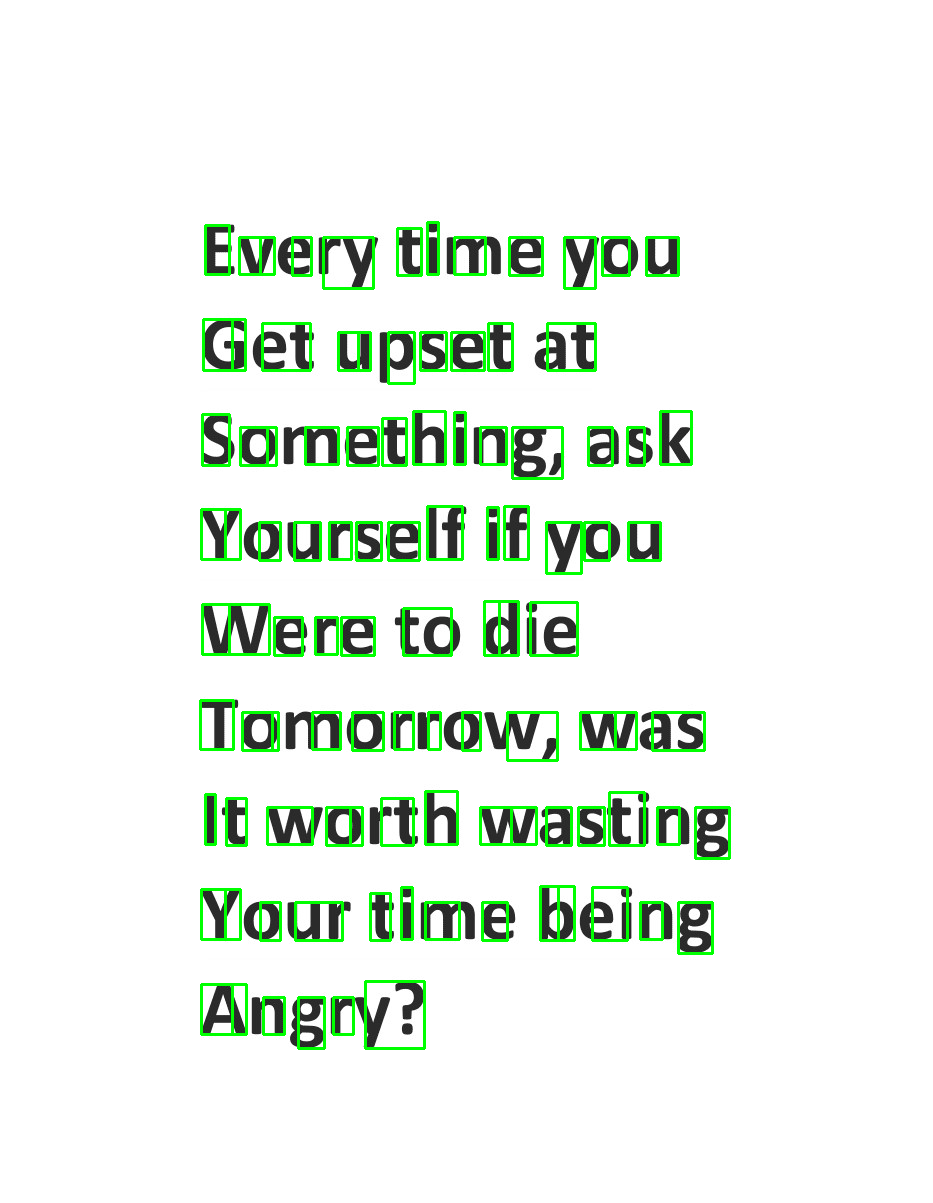

-1

In [ ]:
img=cv2.imread('Grip.jpg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
from pytesseract import Output
img1 = cv2.imread('Grip.jpg')

d = pytesseract.image_to_data(img1, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


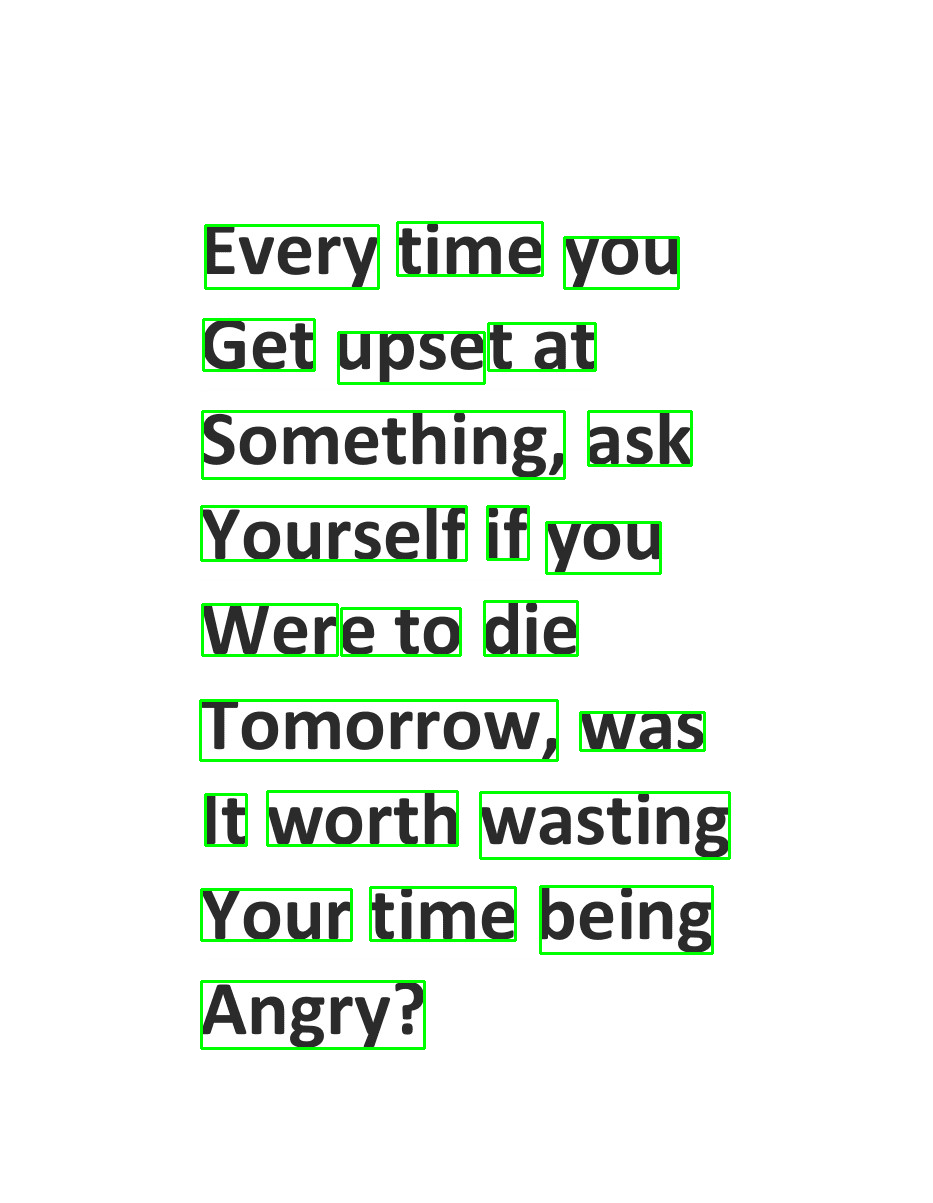

-1

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img1 = cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img1)
cv2.waitKey(0)

In [ ]:
image_path_in_colab="Grip.jpg"
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

Every time you
Get upset at
Something, ask
Yourself if you
Were to die
Tomorrow, was
It worth wasting
Your time being
Angry?



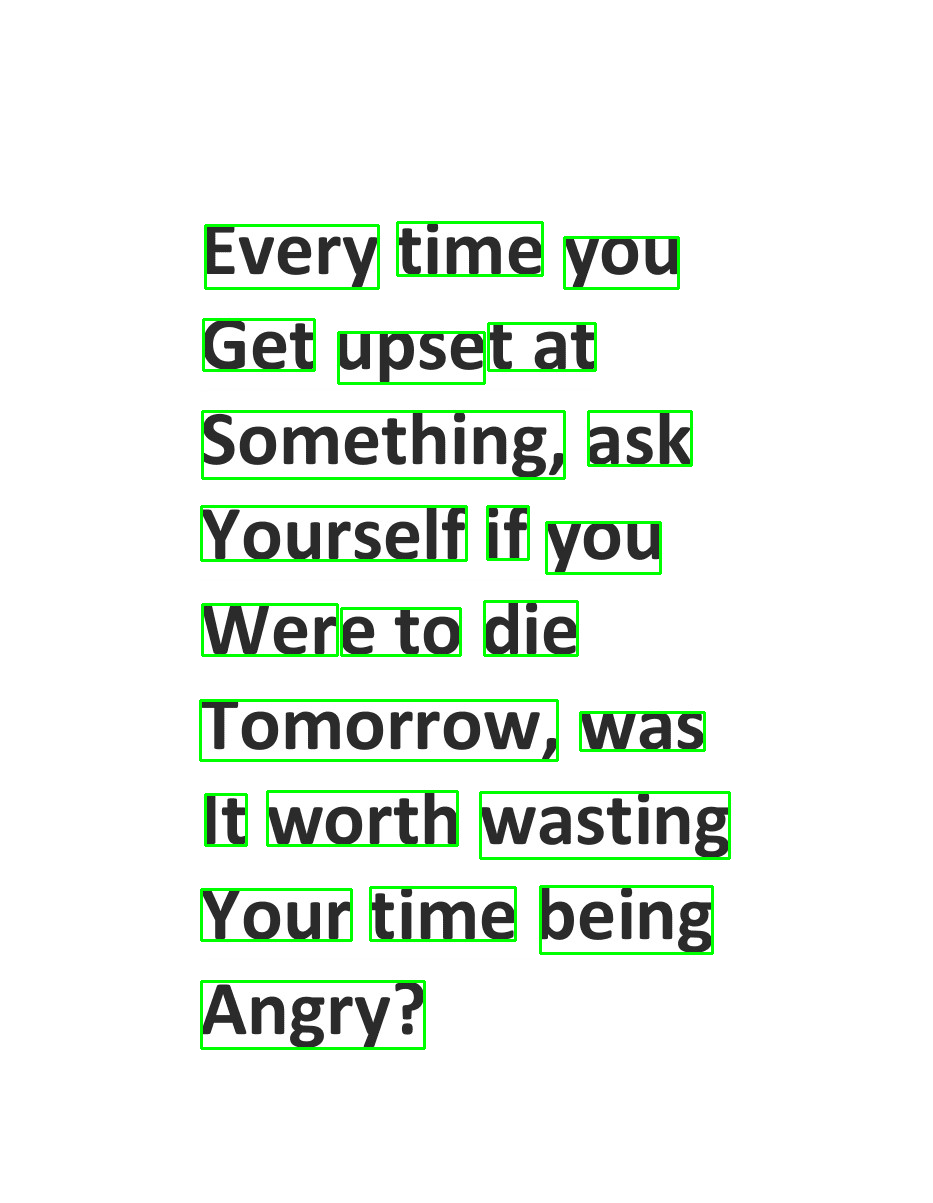

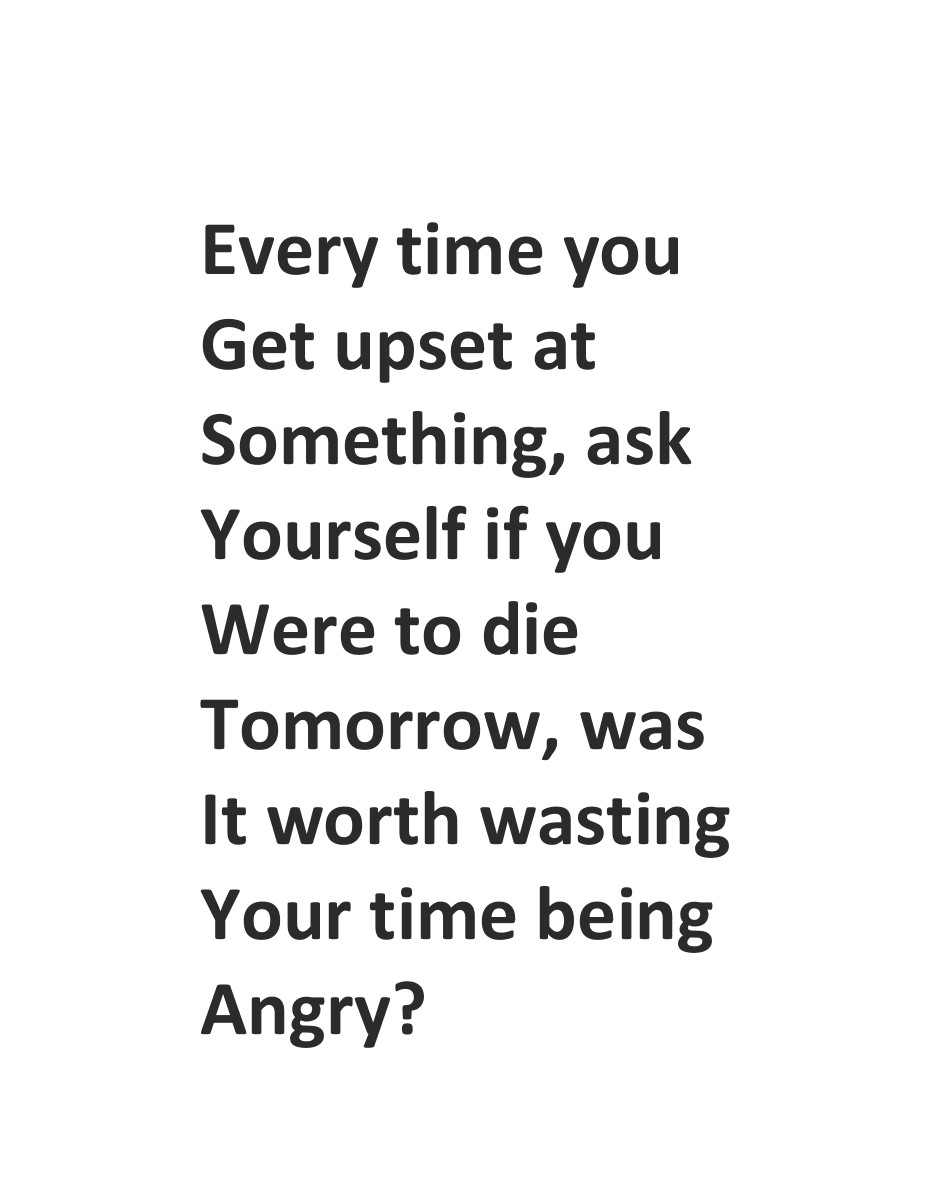

In [ ]:
from IPython.display import Image
cv2_imshow(img1)
Image("Grip.jpg")